In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('/content/HeartFailure.csv')
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
#No nulll values
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

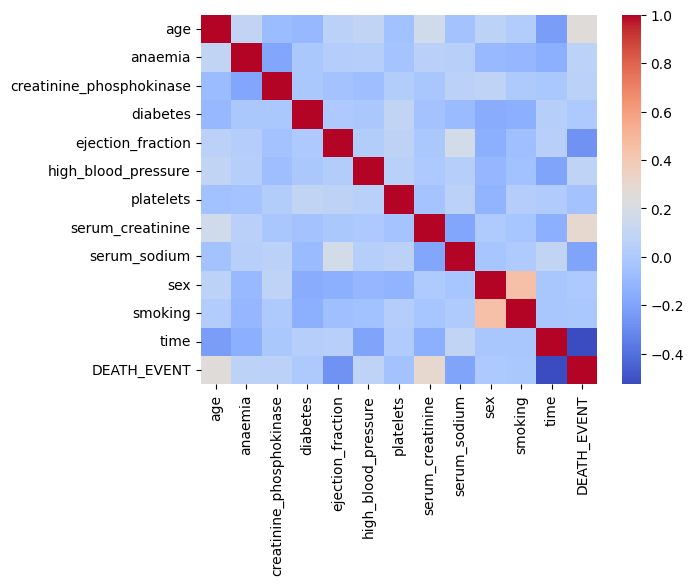

In [ ]:
#Heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix,cmap='coolwarm')
plt.show()

In [ ]:
#Based on the above heatmap
#Relevant features include age, high_blood pressure, serum_creatinine, sex, ejection fraction, diabetes, smoking, time

x = data[['age','high_blood_pressure','serum_creatinine','sex','ejection_fraction','diabetes','smoking','time']].copy()
y = data['DEATH_EVENT']
x.head()

,age,high_blood_pressure,serum_creatinine,sex,ejection_fraction,diabetes,smoking,time
0,75.0,1,1.9,1,20,0,0,4
1,55.0,0,1.1,1,38,0,0,6
2,65.0,0,1.3,1,20,0,1,7
3,50.0,0,1.9,1,20,0,0,7
4,65.0,0,2.7,0,20,1,0,8


In [ ]:
#Data split to training & testing data (7:3)
train_x, test_x,train_y,test_y = train_test_split(x,y,train_size=0.7)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

model_LR = LogisticRegression()
model_LR.fit(train_x,train_y)
y_pred = model_LR.predict(test_x)

score1 = accuracy_score(y_pred,test_y)
print("Accuracy score for Logistic Regression: ",score1*100)

model_SVM = SVC()
model_SVM.fit(train_x,train_y)
y_pred_svm = model_SVM.predict(test_x)

score2 = accuracy_score(y_pred_svm,test_y)
print("Accuracy score for SVM: ",score2*100)

Accuracy score for Logistic Regression:  88.88888888888889
Accuracy score for SVM:  87.77777777777777


In [ ]:
class_repo = classification_report(y_pred,test_y)
print(class_repo)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        67
           1       0.74      0.87      0.80        23

    accuracy                           0.89        90
   macro avg       0.85      0.88      0.86        90
weighted avg       0.90      0.89      0.89        90



In [ ]:
con_mat = confusion_matrix(y_pred,test_y)
print(con_mat)

[[60  7]
 [ 3 20]]
